In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [6]:
df=pd.read_csv("data/train.csv")
df.set_index("id",inplace=True)
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...
18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert


In [7]:
df1=df.copy()

In [8]:
df1["Personality Encoded"]=df1["Personality"].map({"Extrovert":0,"Introvert":1})

In [9]:
df1

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Personality Encoded
id,,,,,,,,,
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert,0
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert,0
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert,1
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert,0
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert,0
...,...,...,...,...,...,...,...,...,...
18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert,0
18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert,0
18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert,1


<Axes: xlabel='Personality Encoded', ylabel='Time_spent_Alone'>

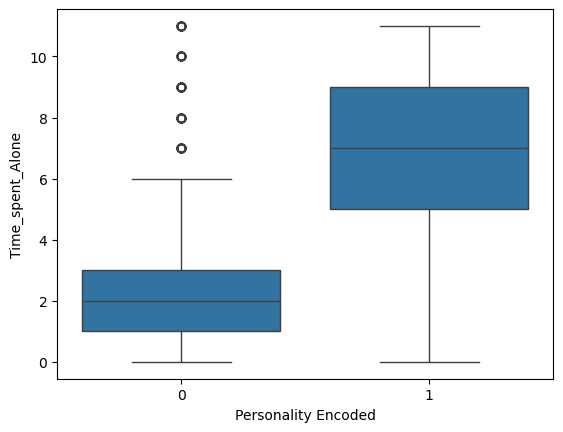

In [13]:
sns.boxplot(data=df1,x="Personality Encoded",y="Time_spent_Alone")

<Axes: xlabel='Personality Encoded', ylabel='Time_spent_Alone'>

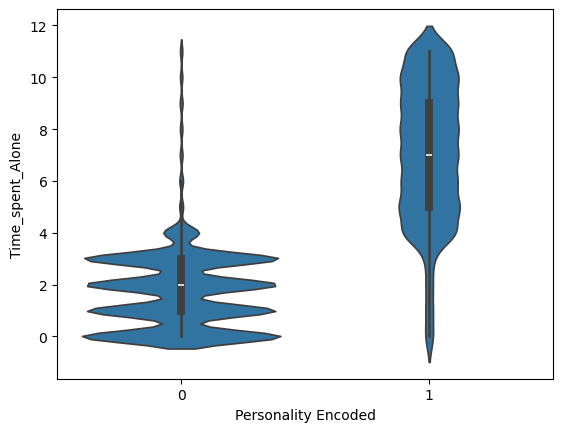

In [14]:
sns.violinplot(data=df1,x="Personality Encoded",y="Time_spent_Alone")

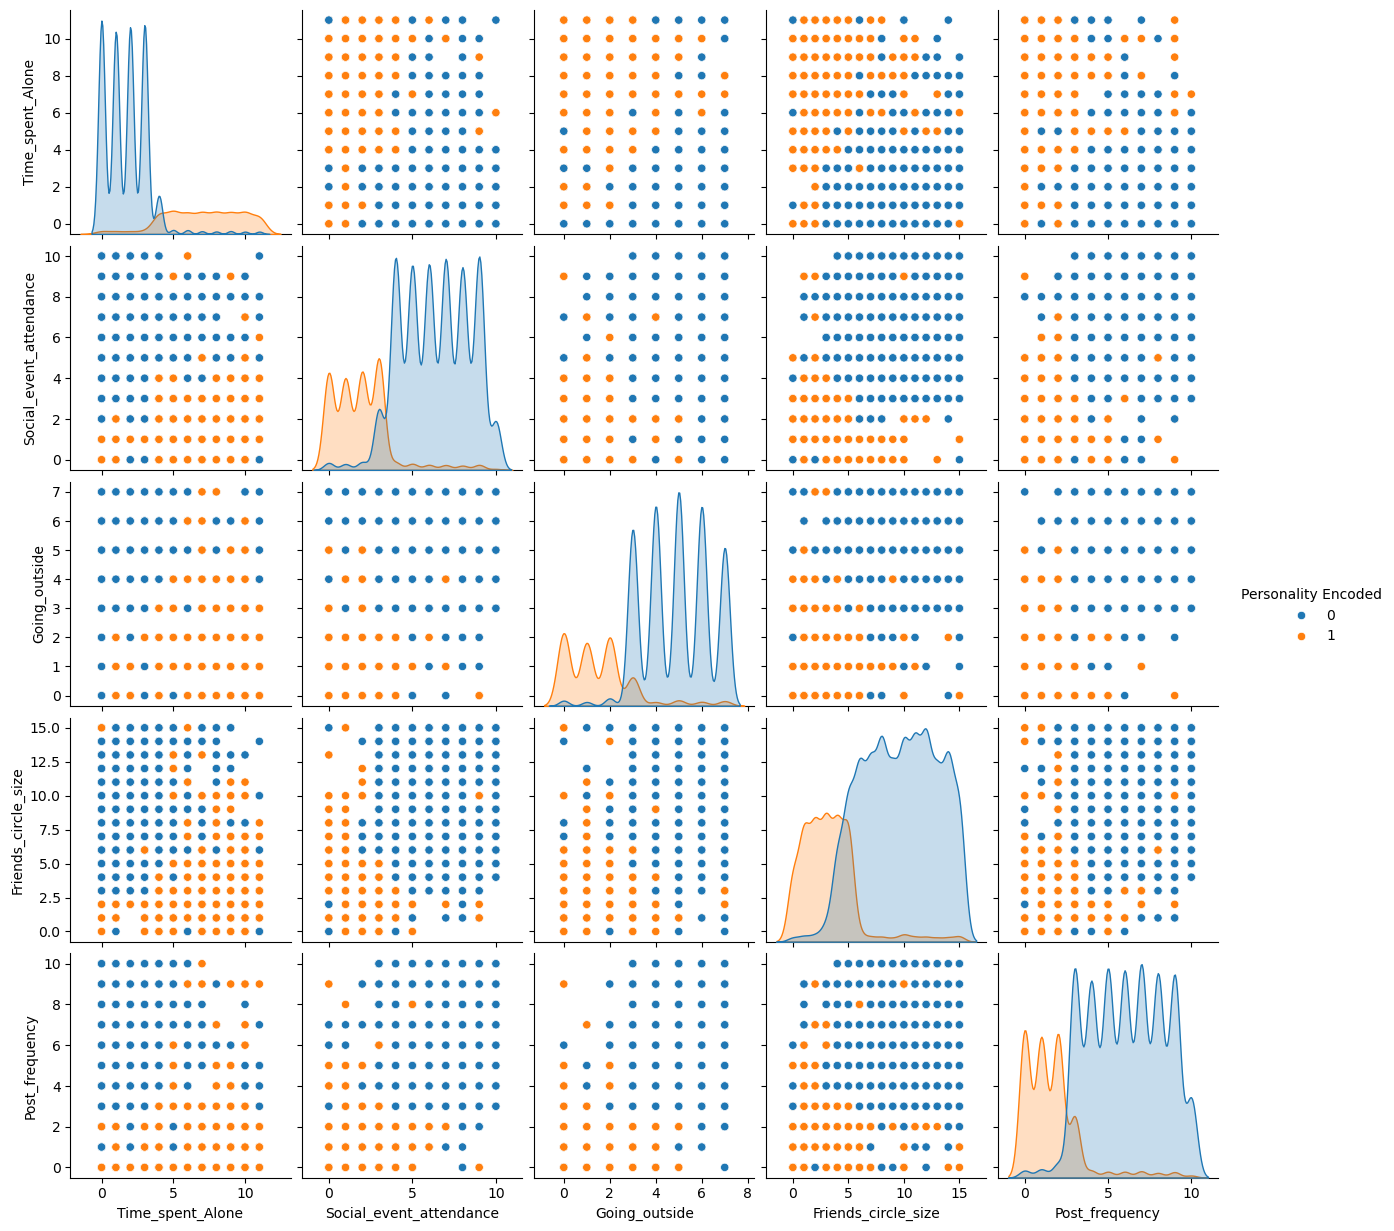

In [17]:
sns.pairplot(df1, kind="scatter", hue="Personality Encoded")


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           17334 non-null  float64
 1   Stage_fear                 16631 non-null  object 
 2   Social_event_attendance    17344 non-null  float64
 3   Going_outside              17058 non-null  float64
 4   Drained_after_socializing  17375 non-null  object 
 5   Friends_circle_size        17470 non-null  float64
 6   Post_frequency             17260 non-null  float64
 7   Personality                18524 non-null  object 
 8   Personality Encoded        18524 non-null  int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 1.4+ MB


In [19]:
df1.isna().sum()

Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
Personality Encoded             0
dtype: int64

In [26]:
X=df1.drop(["Personality","Personality Encoded"],axis=1)
y=df1["Personality Encoded"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
num_feat=["Time_spent_Alone","Social_event_attendance","Going_outside","Friends_circle_size"]
cat_feat=["Stage_fear","Drained_after_socializing"]
cat_trans=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="missing")),("onehot",OneHotEncoder(handle_unknown="ignore",sparse_output=False))])
num_trans=Pipeline(steps=[("imputer",SimpleImputer(strategy="median"))])
preprocessor=ColumnTransformer(transformers=[("cat",cat_trans,cat_feat),("num",num_trans,num_feat)])
pipeline=Pipeline(steps=[("preprocessor",preprocessor),("model",LogisticRegression())])
pipeline.fit(Xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Stage_fear',
                                                   'Drained_after_socializing']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Time_spent_Alone',
                                                   'Social_event_attendance',
                                                   'Going_outside',
                                                   'Friends_circle_size'])])),
                ('model', LogisticRegression())])

In [27]:
pipeline.score(Xtest,ytest)

0.9681511470985156

In [37]:

param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'saga']
}
grid=GridSearchCV(pipeline,param_grid,scoring="accuracy",n_jobs=-1,verbose=True)
grid.fit(Xtrain,ytrain)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Stage_fear',
                                                                          'Drained_after_socializing']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['Time_spent_Alone',
                                                                          'Social_event_attendance',
                                                                          'Going_outside',
                                                                          'Friends_circle_size'])])),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=True)

In [40]:
grid.score(Xtest,ytest)

0.9681511470985156

In [29]:
X=df1.drop(["Personality","Personality Encoded"],axis=1)
y=df1["Personality Encoded"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
num_feat=["Time_spent_Alone","Social_event_attendance","Going_outside","Friends_circle_size"]
cat_feat=["Stage_fear","Drained_after_socializing"]
cat_trans=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="missing")),("onehot",OneHotEncoder(handle_unknown="ignore",sparse_output=False))])
num_trans=Pipeline(steps=[("imputer",SimpleImputer(strategy="median"))])
preprocessor1=ColumnTransformer(transformers=[("cat",cat_trans,cat_feat),("num",num_trans,num_feat)])
pipeline1=Pipeline(steps=[("preprocessor",preprocessor1),("model",RandomForestClassifier())])
pipeline1.fit(Xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Stage_fear',
                                                   'Drained_after_socializing']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Time_spent_Alone',
                                                   'Social_event_attendance',
                                                   'Going_outside',
                                                   'Friends_circle_size'])])),
                ('model', RandomForestClassifier())])

In [30]:
pipeline1.score(Xtest,ytest)

0.9608636977058029

In [32]:
from xgboost import XGBClassifier

In [33]:
X=df1.drop(["Personality","Personality Encoded"],axis=1)
y=df1["Personality Encoded"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
num_feat=["Time_spent_Alone","Social_event_attendance","Going_outside","Friends_circle_size"]
cat_feat=["Stage_fear","Drained_after_socializing"]
cat_trans=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="missing")),("onehot",OneHotEncoder(handle_unknown="ignore",sparse_output=False))])
num_trans=Pipeline(steps=[("imputer",SimpleImputer(strategy="median"))])
preprocessor1=ColumnTransformer(transformers=[("cat",cat_trans,cat_feat),("num",num_trans,num_feat)])
pipeline1=Pipeline(steps=[("preprocessor",preprocessor1),("model",XGBClassifier())])
pipeline1.fit(Xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Stage_fear',
                                                   'Drained_after_socializing']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Time_sp...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [34]:
pipeline1.score(Xtest,ytest)

0.9670715249662618

In [56]:
dftest=pd.read_csv("data/test.csv")


In [57]:
dftest.columns

Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency'],
      dtype='object')

In [68]:
predictions=pipeline.predict(dftest)

In [69]:
preds_labels = pd.Series(predictions).map({0: "Extrovert", 1: "Introvert"})

In [71]:
ans=pd.DataFrame({"id":dftest["id"],"Personality":preds_labels})
ans
ans.to_csv("ans.csv",index=False)

In [50]:
from sklearn.model_selection import cross_val_score 

In [52]:
cross_val_score(pipeline,Xtest,ytest,cv=5).mean()

np.float64(0.9681511470985156)